    student_id            name dept gender  semester section  height_cm  \
0        S0167   Maliha Sarker  MEE   Male         7       B      178.1   
1        S0024     Hasan Ahmed  PHY   Male         3       A      172.1   
2        S0129     Hasan Islam  STA   Male         5       B      174.3   
3        S0093  Jannat Sultana  MAT   Male         2       D      178.5   
4        S0287    Nabila Karim  iPe   Male         6       C      167.0   
..         ...             ...  ...    ...       ...     ...        ...   
301      S0120    Mahir Barman  CSE   Male         2       B      168.8   
302      S0277  Tamanna Rahman  MAT   Male         4       B      171.8   
303      S0215       Hasan Roy  PHY   Male         5       D      176.3   
304      S0259   Nishat Sarker  CSE   Male         6       D      177.5   
305      S0149     Nafis Akter  EEE   Male         8       B        NaN   

     weight_kg  att_T1  att_T2  ...  ontime_A5  ontime_A6  ontime_A7  \
0        180.0       0     

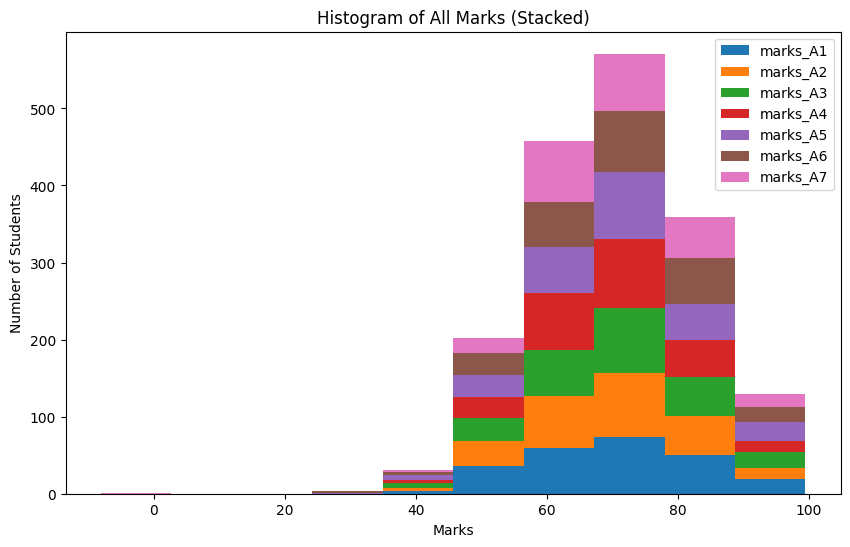

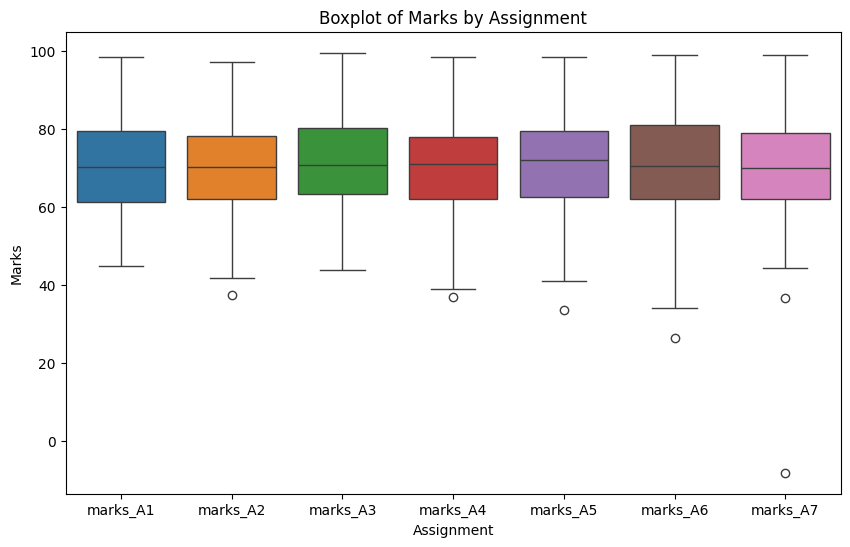

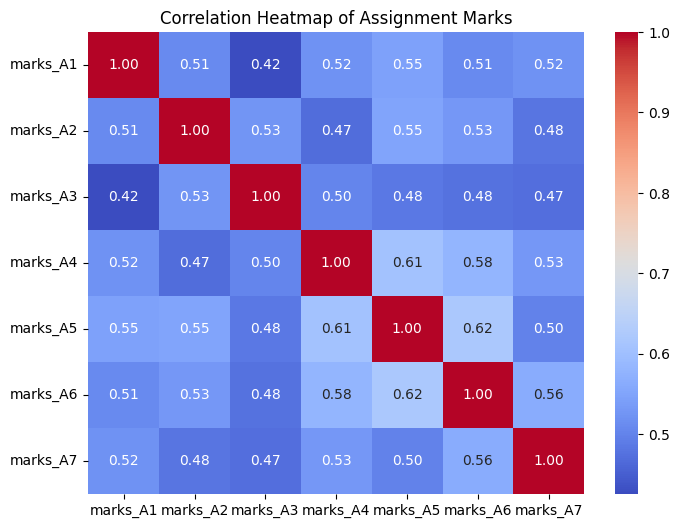

            Mean_Marks                                  Total_Marks  \
section              A          B          C          D           A   
dept                                                                  
 CSE               NaN  75.514286  68.308889        NaN         NaN   
C.S.E              NaN  86.628571  66.958333  78.320000         NaN   
CSE          68.585223  71.258707  69.146317  70.494397  385.418750   
CSE                NaN  83.194048        NaN  83.157143         NaN   
E.E.E        64.133333        NaN  66.514286        NaN  384.800000   
EEE          70.491984  70.765739  72.465568  69.027000  418.083333   
EEE                NaN  77.220000        NaN  77.475000         NaN   
ElecEng      76.557143  59.283333        NaN        NaN  535.900000   
IPE          68.886071  74.457143  68.728571  63.366667  429.400000   
MAT          70.265952  70.518254  72.810714  61.799167  396.816667   
MEE          77.391667  72.928750  72.880000  69.771000  379.600000   
Mathem

In [18]:
# 1 loaded the data set, printed row x columns and checked student_id uniqueness
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('c:/Users/Win Technology/Downloads/final_gradebook.csv')
print(df)
print(df.shape)
is_unique = df['student_id'].is_unique
print(is_unique)
# 2 showing dtypes and % missing for each column
print(df.dtypes)
missing = df.isnull().mean()*100
print(missing)
#groupby
df.groupby("dept")["student_id"].count()
df.groupby("gender")["student_id"].count()
3# 4 normalizing dept and gender to clean categories
def normalize_dept(s):
    s = s.astype(str).str.strip().str.upper()
    mapping = {
        "cse":"CSE","C.S.E":"CSE",
        "E.E.E":"EEE","ElecEng":"EEE",
        "IPE":"IPE","iPe":"IPE",
        "MAT":"Math","Mathmatics":"Math","mat":"Math",
        "PHY":"Physics","Physics":"Physics",
        "MEE":"MEE","mee":"MEE",
        "STA":"Stat","Statistics":"Stat","sta":"Statistics",
        "SoftwareEng":"SWE","SWE":"SWE","swe":"SWE"
    }    
    return s.replace(mapping).str.upper()

df["dept_clean"]= normalize_dept(df["dept"])
print(df.groupby("dept_clean")["student_id"].count())


def normalize_gender (f):
    f = f.astype(str).str.strip().str.upper()
    mapping = {
        "F":"FEMALE","FEMALE":"FEMALE","Female":"FEMALE","female":"FEMALE",
        "M":"MALE","Male":"MALE","MALE":"MALE","male":"MALE","Other":"OTHER",
    }
    return f.replace(mapping).str.upper()
df["gender_clean"] = normalize_gender(df["gender"])
print(df.groupby("gender_clean")["student_id"].count())

# 5 Detect outliers in height_cm and weight_kg using IQR
def flag_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return ~series.between(lower, upper)

df['height_outlier'] = flag_outliers(df['height_cm'])
df['weight_outlier'] = flag_outliers(df['weight_kg'])

print(df[['student_id', 'height_cm', 'height_outlier', 'weight_kg', 'weight_outlier']])

### 2 Student level summary

attendance_cols = ["att_T1", "att_T2", "att_T3", "att_T4", "att_T5", "att_T6", "att_T7"] #Attended sessions
df["Attended_sessions"] = df[attendance_cols].sum(axis=1)
print(df[["student_id", "Attended_sessions"]])

submission_cols = ["submitted_A1", "submitted_A2", "submitted_A3","submitted_A4", "submitted_A5", "submitted_A6", "submitted_A7"]
df["Submitted_count"] = df[submission_cols].sum(axis = 1) #Submitted Counts
print(df[["student_id", "Submitted_count"]])

marks_cols = ["marks_A1", "marks_A2", "marks_A3", "marks_A4", "marks_A5", "marks_A6", "marks_A7"]
# Calculate total, mean, median, best, and worst marks for each student
df["Total_Marks"] = df[marks_cols].sum(axis=1)
print(df["Total_Marks"])
df["Mean_Marks"] = df[marks_cols].mean(axis=1)
print(df["Mean_Marks"])
df["Median_Marks"] = df[marks_cols].median(axis=1)
print(df["Median_Marks"])
df["Best_Mark"] = df[marks_cols].max(axis=1)
print(df["Best_Mark"])
df["Worst_Mark"] = df[marks_cols].min(axis=1)
print(df["Worst_Mark"])

# Display top 10 students by total marks
top10_students = df.sort_values(by="Total_Marks", ascending=False).head(10)

### 3   Assignment level analysis

submission_counts = df[marks_cols].count()  # Number submitted
print(submission_counts)
median_marks = df[marks_cols].median() # Median Marks
print(median_marks) 
# Standard deviation for each assignment
std_marks = df[marks_cols].std()
print(std_marks)
outlier_counts = {}                                     # Count outliers
for col in marks_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    outlier_counts[col] = len(outliers)

print(outlier_counts)
## Answering two questions
marks_cols = ["marks_A1", "marks_A2", "marks_A3", "marks_A4", "marks_A5", "marks_A6", "marks_A7"]

# Calculate median and std for each assignment
median_marks = df[marks_cols].median()
std_marks = df[marks_cols].std()

# a) Hardest assignment → lowest median
hardest_assignment = median_marks.idxmin()  # returns column name with lowest median
lowest_median = median_marks.min()
print(f"Hardest assignment: {hardest_assignment} (Median = {lowest_median})")

# b) Most variable assignment → highest standard deviation
most_variable_assignment = std_marks.idxmax()  # returns column name with highest std
highest_std = std_marks.max()
print(f"Most variable assignment: {most_variable_assignment} (Std = {highest_std})")


### 4   Histogram of all plots

# i. Histogram of all marks (stacked)

plt.figure(figsize=(10,6))
plt.hist([df[col].dropna() for col in marks_cols], bins=10, stacked=True, label=marks_cols)  
plt.xlabel("Marks")
plt.ylabel("Number of Students")
plt.title("Histogram of All Marks (Stacked)")
plt.legend()
plt.show()

# ii. Boxplot of marks by assignment

plt.figure(figsize=(10,6))
sns.boxplot(data=df[marks_cols])
plt.xlabel("Assignment")
plt.ylabel("Marks")
plt.title("Boxplot of Marks by Assignment")
plt.show()

# iii. Correlation heatmap of marks
plt.figure(figsize=(8,6))
corr_matrix = df[marks_cols].corr()  # correlation between assignments
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Assignment Marks")
plt.show()

### 5 . Group comparison
# Pivot table

# Total and mean marks per student
marks_cols = ["marks_A1", "marks_A2", "marks_A3", "marks_A4", "marks_A5", "marks_A6", "marks_A7"]

# Total and mean marks per student
df["Total_Marks"] = df[marks_cols].sum(axis=1)
df["Mean_Marks"] = df[marks_cols].mean(axis=1)
# Pivot table: mean and total marks by dept x section
pivot_table = pd.pivot_table(
    df,
    index="dept",
    columns="section",
    values=["Mean_Marks", "Total_Marks"],
    aggfunc="mean"   # average if multiple students in same dept & section
)

print(pivot_table)

#Find the cell with the highest total_marks
total_marks_table = pivot_table["Total_Marks"]

max_total = total_marks_table.max().max()  
dept_section_max = total_marks_table.stack().idxmax()

print(f"Highest total_marks: {max_total}")
print(f"Dept and Section: {dept_section_max}")

### 6. Exports and insights

df.to_csv("final_gradebook.csv", index=False)  

print("Saved final_gradebook.csv with all summary columns!") 


